In [6]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime

In [7]:
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print (sess.run(c))

[[22. 28.]
 [49. 64.]]


In [8]:
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print (sess.run(c))

[[22. 28.]
 [49. 64.]]


In [9]:
shape=(int(10000),int(10000))
 
with tf.device("/gpu:0"):
    random_matrix = tf.random_uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)
 
startTime = datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)
 
print("\n" * 2)
print("Time taken:", datetime.now() - startTime)
print("\n" * 2)

250006340000.0



Time taken: 0:00:00.696207





In [22]:
import numpy as np
import pandas as pd
import json

In [2]:
#https://www.kaggle.com/rounakbanik/the-movies-dataset
meta = pd.read_csv(r"C:\Users\user\Downloads\the-movies-dataset\movies_metadata.csv")
meta.head()

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
meta = meta[['id','original_title','original_language','genres']]
meta = meta.rename(columns = {'id': 'movieId'})
meta = meta[meta['original_language'] == 'en']
meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,en,"[{'id': 35, 'name': 'Comedy'}]"


In [4]:
ratings = pd.read_csv(r"C:\Users\user\Downloads\the-movies-dataset\ratings_small.csv")
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
meta.movieId = pd.to_numeric(meta.movieId, errors = 'coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors = 'coerce')

In [6]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'','"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])
    
    return genres_list
meta['genres'] = meta['genres'].apply(parse_genres)

In [7]:
meta.head()

,movieId,original_title,original_language,genres
0,862,Toy Story,en,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[Comedy]


In [8]:
data = pd.merge(ratings, meta, on = 'movieId', how = 'inner')
data.head()

,userId,movieId,rating,original_title,original_language,genres
0,1,1371,2.5,Rocky III,en,[Drama]
1,4,1371,4.0,Rocky III,en,[Drama]
2,7,1371,3.0,Rocky III,en,[Drama]
3,19,1371,4.0,Rocky III,en,[Drama]
4,21,1371,3.0,Rocky III,en,[Drama]


In [9]:
matrix = data.pivot_table(index = 'userId', columns = 'original_title', values = 'rating')
matrix.head()

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,1408,...,Young and Innocent,Zaat,Zabriskie Point,Zapped Again!,Zardoz,Zodiac,eXistenZ,xXx,¡Three Amigos!,Мой сводный брат Франкенштейн
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
GENRE_WEIGHT = 0.1
#피어슨 상관계수: 평균을 빼서 곱한다. 양/음응로 판단
def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))
#추천 함수
GENRE_WEIGHT = 0.1
def recommend(input_movie, matrix, n, similar_genre = True):
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
        
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))
            
    result.sort(key = lambda r: r[1], reverse=True)

    return result[:n]

In [11]:
recommend_result = recommend('Rocky III', matrix, 10, similar_genre = True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Title,Correlation,Genre
0,About Schmidt,0.40,"[Drama, Comedy]"
1,Rocky V,0.40,[Drama]
2,54,0.39,"[Music, Drama]"
3,Michael,0.39,"[Comedy, Drama, Fantasy]"
4,Millennium,0.39,"[Mystery, Drama, Science Fiction, Thriller]"
5,Touch of Evil,0.38,"[Drama, Thriller, Crime]"
6,The House of the Spirits,0.35,"[Romance, Drama]"
7,Midnight in the Garden of Good and Evil,0.33,"[Crime, Drama, Mystery, Thriller]"
8,Population 436,0.33,"[Drama, Horror, Mystery, Thriller]"
9,Porgy and Bess,0.33,"[Music, Drama, Romance]"


##

In [26]:
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_df_2 =  pd.read_csv(songs_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [28]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

In [29]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
4378,The Scientist - Coldplay,27,0.27
4712,Use Somebody - Kings Of Leon,27,0.27
3476,Revelry - Kings Of Leon,26,0.26
1387,Fireflies - Charttraxx Karaoke,24,0.24
1862,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,0.23


In [31]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
train_data.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year,song
7389,94d5bdc37683950e90c56c9b32721edb5d347600,SOXNZOW12AB017F756,2,Half Of My Heart,Battle Studies,John Mayer,0,Half Of My Heart - John Mayer
9275,1012ecfd277b96487ed8357d02fa8326b13696a5,SOXHYVQ12AB0187949,1,The Beautiful People,Antichrist Superstar (Ecopac Explicit),Marilyn Manson,0,The Beautiful People - Marilyn Manson
2995,15415fa2745b344bce958967c346f2a89f792f63,SOOSZAZ12A6D4FADF8,1,Sanctify Yourself,Glittering Prize 81/92,Simple Minds,1985,Sanctify Yourself - Simple Minds
5316,ffadf9297a99945c0513cd87939d91d8b602936b,SOWDJEJ12A8C1339FE,4,Heart Cooks Brain,Everything Is Nice: The Matador Records 10th A...,Modest Mouse,1997,Heart Cooks Brain - Modest Mouse
356,5a905f000fc1ff3df7ca807d57edb608863db05d,SOAMPRJ12A8AE45F38,20,Rorol,Identification Parade,Octopus Project,2002,Rorol - Octopus Project


In [32]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

In [39]:
users = song_df['user_id'].unique()
songs = song_df['song'].unique()

In [40]:
#개인화가 이루워 지지 않음 트레이닝 데이터와 user_id가 주어졌을 떄 각 노래에 대해 user_id의 count를 계산하고
#추천 점수로 사용합니다. 각 노래가 몇 번 재생됬는지이고 추천 점수에 따라 노래를 정렬한다.
#추천 점수는 사용자가 준 점수는 그 노래가 몇 번 재생됬는지로 계산됩니다.
#임이의 사용자에게 그냥 상위 10개의 곡을 추천해주는것이다.
#결국 재생횟수에 기반해서 고른 상위10개의 곡이다.
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,37,1.0
4083,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,27,2.0
931,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,24,4.0
3034,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,21,5.0
3189,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets - OneRepublic,21,6.0
4112,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,21,7.0
1207,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,20,8.0
1577,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,19,9.0
1626,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [42]:
user_id = users[8]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,9bb911319fbc04f01755814cb5edb21df3d1a336,Sehr kosmisch - Harmonia,37,1.0
4083,9bb911319fbc04f01755814cb5edb21df3d1a336,Undo - Björk,27,2.0
931,9bb911319fbc04f01755814cb5edb21df3d1a336,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9bb911319fbc04f01755814cb5edb21df3d1a336,You're The One - Dwight Yoakam,24,4.0
3034,9bb911319fbc04f01755814cb5edb21df3d1a336,Revelry - Kings Of Leon,21,5.0
3189,9bb911319fbc04f01755814cb5edb21df3d1a336,Secrets - OneRepublic,21,6.0
4112,9bb911319fbc04f01755814cb5edb21df3d1a336,Use Somebody - Kings Of Leon,21,7.0
1207,9bb911319fbc04f01755814cb5edb21df3d1a336,Fireflies - Charttraxx Karaoke,20,8.0
1577,9bb911319fbc04f01755814cb5edb21df3d1a336,Hey_ Soul Sister - Train,19,9.0
1626,9bb911319fbc04f01755814cb5edb21df3d1a336,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [41]:
#개인화
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

In [43]:
#아이템 - 아이템기반의 추천 시스템 (유사성 기반 알고리즘)
#generate_top_recommendations -> co-occurrence행렬을 만든다
#좋아했던 노래 목록을 바탕으로 그 노래를 ㄹ좋아했떤 다른 사용자와 그 사용자는 어떤 노래를 좋아했을지도 고려해서  추천
#co - occrurrence행렬은 각 행과 각 열에 같은 값을 넣는다. 그래서 보통 희소행렬이 많다.
#recession 과 recall로 평가한다 -> 추천시스템으 거의 대부분 이걸로 평가함
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 4bd88bfb25263a75bbdd467e74018f4ae570e5df:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


In [44]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10


In [45]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1
1,,Bad Company - Five Finger Death Punch,0.375000,2
2,,Love Me - Justin Bieber,0.333333,3
3,,One Time - Justin Bieber,0.333333,4
4,,Here Without You - 3 Doors Down,0.333333,5
5,,Stuck In The Moment - Justin Bieber,0.333333,6
6,,Teach Me How To Dougie - California Swag District,0.333333,7
7,,Paper Planes - M.I.A.,0.333333,8
8,,Already Gone - Kelly Clarkson,0.333333,9
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10


In [46]:
song = 'Yellow - Coldplay'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1
1,,Creep (Explicit) - Radiohead,0.291667,2
2,,Clocks - Coldplay,0.280000,3
3,,Seven Nation Army - The White Stripes,0.250000,4
4,,Paper Planes - M.I.A.,0.208333,5
5,,Halo - Beyoncé,0.200000,6
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7
7,,In My Place - Coldplay,0.181818,8
8,,Kryptonite - 3 Doors Down,0.166667,9
9,,When You Were Young - The Killers,0.166667,10


In [48]:
import time

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:baf47ed8da24d607e50d8684cde78b923538640f
No. of unique songs for the user: 84
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :10714
Getting recommendations for user:e4e99e5b3223bec258cf2ff0d090d05a06302344
No. of unique songs for the user: 4
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :674
Getting recommendations for user:515c6d7023ad31411c1f6b11e0b2f56810348bee
No. of unique songs for the user: 15
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1152
Getting recommendations for user:b96f2a9cbd9d86b4f9f15978dd3abbdfafe26502
No. of unique songs for the user: 7
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :285
Getting recommendations for user:1b704d4cddabea8258bd93497fcb73eab32fa592
No. of unique songs for the user: 117
no. of unique songs in th

In [50]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


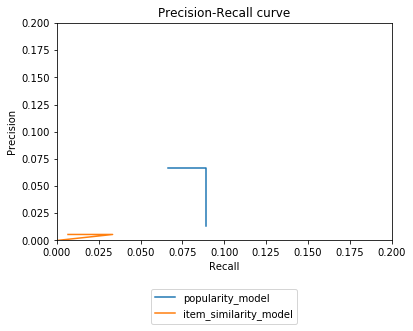

In [51]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [52]:
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).


NameError: name 'joblib' is not defined

In [53]:
# SVD기반 추천시스템: SVD는 행렬를 분해하는 하나의 방법이다 